## CSEN 1095 - Data Engineering
#### _German University in Cairo_

Collaborators:
- Nada Hammouda
- Aya Ibrahim | 37-1574
- Habiba ElHussein
- Youssef Tarek | 37-3865

<div style="background-color:#159957;text-align:center; vertical-align: middle; padding:40px 0;color:rgb(255,255,255);">
    <h1>Visual History of Nobel Prize Winners</h1>
</div>



- Project Website: https://yousseftarekkh.github.io/de-noble-prizes/
- Github: https://github.com/yousseftarekkh/de-noble-prizes/

In [1]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# read the data (on the web)
data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
 
# copyright and source data info
plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
 
# Save as png
plt.savefig('./data/#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')


FileNotFoundError: [Errno 2] No such file or directory: '/home/youssef/anaconda3/share/proj/epsg'

## Overview & Motivation

This project aims to apply several steps of data refactoring and cleaning in order to visually analyze and introduce potential data fixes to the acquired data set. Such steps can help further identify relations, recognize hidden patterns in different countries, pay attention to trending categories and generally reach conclusions and answers about many proposed questions among the data records which in our case represents **<span style="color:brown">Nobel Prize winners</span>**.

The following research will be held in a **Q&A** driven structure; meaning we will propose potential questions and put effort into trying to derive answers and conclusions.

Initially, we used the following data set found at https://www.datacamp.com/projects/441. Additional data sets may be used in order to succesfully form a tidy data with less missing values and for the sake of adding more valuable records to the existing data set. All used references will be included in the next section.

## Related Work

We have been influenced by a lot of work after a research we conducted on this particular topic and we found the following sites interesting for a certain cause.
- https://www.datacamp.com/projects/441 - The mentioned project tasks included some interesting questions we needed to find answers to, thus we decided to re-engineer the data to properly formulate answers.
- https://www.kaggle.com/devisangeetha/nobel-prize-winners-story - Inspired on how well and organized that research was and the outcome that this research helped discovering.
- https://www.nobelprize.org/prizes/facts/nobel-prize-facts/ - Website contains a large bulk of Nobel Prize winners facts including both interesting and shocking events in the history.

## Questions

The main questions that motivated that project were:
    1. 
    1. What are the categories that hold the most noble prizes ?
    2. Who are the youngest and the oldest noble prize winners ?
    3. Who is the first female to win a noble prize ?
    4. Is there a relation between the nobel prize winners?
    5. 


Modules we will be using are listed bellow.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In order to get a better look at the data, we will preview a sample to visually analyze the attributes assigned to each record. 

In [5]:
nps_df = pd.read_csv("data/archive.csv")
nps_df.sample(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
105,1921,Peace,The Nobel Peace Prize 1921,NaN,1/2,485,Individual,Karl Hjalmar Branting,1860-11-23,Stockholm,Sweden,Male,NaN,NaN,NaN,1925-02-24,Stockholm,Sweden
545,1981,Physics,The Nobel Prize in Physics 1981,"""for their contribution to the development of ...",1/4,119,Individual,Arthur Leonard Schawlow,1921-05-05,"Mount Verno, NY",United States of America,Male,Stanford University,"Stanford, CA",United States of America,1999-04-28,"Palo Alto, CA",United States of America
742,2000,Physics,The Nobel Prize in Physics 2000,"""for basic work on information and communicati...",1/4,727,Individual,Herbert Kroemer,1928-08-25,Weimar,Germany,Male,University of California,"Santa Barbara, CA",United States of America,NaN,NaN,NaN


After having a look at the columns, we need to examine some columns of concerns which could help us in picking the right methods to perform data cleaning.

In [6]:
def renameNan(n):
    key, value = n
    if key != key:
        return ("none",value)
    return (key, value)

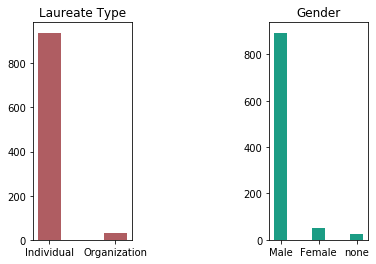

In [7]:
ind = np.arange(2)
width = 0.35
fig, axs = plt.subplots(1,3)
items = nps_df['Laureate Type'].value_counts(dropna=False)
laureates_types = list(items.items())
items = nps_df['Sex'].value_counts(dropna=False)
items_na = nps_df['Sex'].isnull().sum(axis = 0)
gender = list(map(renameNan, items.items()))
laureates_types_count = [[ i for i, j in laureates_types ], 
       [ j for i, j in laureates_types ]] 
gender_count = [[ i for i, j in gender ], 
       [ j for i, j in gender ]]
axs[0].bar(ind, laureates_types_count[1], width,color="#af5d62", tick_label = laureates_types_count[0])
axs[0].set_title("Laureate Type")
axs[0].textcoords="offset points"

axs[1].axis('off')
ind = np.arange(3)
width = 0.35
axs[2].bar(ind, gender_count[1], width, color="#1b9c84", tick_label = gender_count[0])
axs[2].set_title("Gender")


plt.show()

From the above graphs, we see that the data is not entirely consistent since the records contain both `Individual` and `Organization` values for the <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Laureate Type</span> winning the nobel prizes. Moreover indicated by the <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Sex</span> column which denotes that the data contains attribute variations which are crucial for some of the questions.

Next step for our data cleaning process is to strictly indicate that some of the missing values are not missing due to falsified data nor noise existence, simply irrelevant attribute for certain records. Thus we must inspect the occurence of the missing values in each column and re-engineer the entire column if the missing value exceeded a significant percentage from the data set.

In [8]:
missing_values_count = nps_df.isnull().sum()
missing_values_count[missing_values_count > 0]

Motivation               88
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

Apparently, multiple columns include missing values. Thus we will calculate the percentage of the missing values among the entire data set.

In [9]:
total_cells_nfl = np.product(nps_df.shape) 
total_missing_nfl = missing_values_count.sum()

percentage_missign_values_nfl = (total_missing_nfl/total_cells_nfl) * 100
print(str(percentage_missign_values_nfl.round())+'%')

12.0%


In [10]:
nps_df[nps_df['Sex'].isnull()].sample(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,1999,Peace,The Nobel Peace Prize 1999,"""in recognition of the organization's pioneeri...",1/1,568,Organization,Médecins Sans Frontières,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Laureate Types can have more than one value.

Changing the null values of the <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Birth Date</span> column to `none` as it does not exist

Changing the null values of the <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Birth City</span> column to `none` as it does not exist

Changing the null values of the <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Birth Country</span> column to `none` as it does not exist

In [11]:
cleaned_nps_df = nps_df.copy()

cleaned_nps_df.loc[cleaned_nps_df['Sex'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization'), 'Sex'] = 'Organization'
print(cleaned_nps_df[cleaned_nps_df['Sex']== 'Organization']['Full Name'])

cleaned_nps_df.loc[cleaned_nps_df['Birth Date'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') & 
         (cleaned_nps_df['Sex'] == 'Organization'), 'Birth Date'] = 'none'


cleaned_nps_df.loc[cleaned_nps_df['Birth City'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') & 
         (cleaned_nps_df['Sex'] == 'Organization'), 'Birth City'] = 'none'



cleaned_nps_df.loc[cleaned_nps_df['Birth Country'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') & 
         (cleaned_nps_df['Sex'] == 'Organization'), 'Birth Country'] = 'none'

missing_values_count = cleaned_nps_df.isnull().sum()
missing_values_count[missing_values_count > 0]

24     Institut de droit international (Institute of ...
61     Bureau international permanent de la Paix (Per...
90     Comité international de la Croix Rouge (Intern...
206    Office international Nansen pour les Réfugiés ...
222    Comité international de la Croix Rouge (Intern...
244                Friends Service Council (The Quakers)
245     American Friends Service Committee (The Quakers)
295    Office of the United Nations High Commissioner...
365    Comité international de la Croix Rouge (Intern...
366    Ligue des Sociétés de la Croix-Rouge (League o...
383              United Nations Children's Fund (UNICEF)
416           International Labour Organization (I.L.O.)
498                                Amnesty International
543    Office of the United Nations High Commissioner...
578    International Physicians for the Prevention of...
610                   United Nations Peacekeeping Forces
682     Pugwash Conferences on Science and World Affairs
705       International Campaig

Motivation               88
Birth Date                3
Birth City                2
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [12]:

cleaned_nps_df.loc[cleaned_nps_df['Organization Country'].isnull(), 'Organization City'].unique()

array([nan, 'Tunis'], dtype=object)

In [13]:
cleaned_nps_df.loc[cleaned_nps_df['Organization City'] == 'Tunis', 'Organization Country'] = 'Tunis'

missing_values_count = cleaned_nps_df.isnull().sum()
missing_values_count[missing_values_count > 0]

Motivation               88
Birth Date                3
Birth City                2
Organization Name       247
Organization City       253
Organization Country    252
Death Date              352
Death City              370
Death Country           364
dtype: int64

Imputing the <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Organization Name</span> from <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Full Name</span> based on the fact that the name of organization is the <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Full Name</span> when the laureate type is <span style="color:#c7254e; padding: 2px 4px;background-color:#f9f2f4;borer-radius: 4px;">Organization</span>

In [14]:
cleaned_nps_df.loc[cleaned_nps_df['Organization Name'].isnull() & (cleaned_nps_df['Laureate Type'] == 'Organization') &
         (cleaned_nps_df['Sex'] == 'Organization'), 'Organization Name'] = cleaned_nps_df['Full Name']

missing_values_count = cleaned_nps_df.isnull().sum()
missing_values_count[missing_values_count > 0]

Motivation               88
Birth Date                3
Birth City                2
Organization Name       221
Organization City       253
Organization Country    252
Death Date              352
Death City              370
Death Country           364
dtype: int64

### Question 1: What are the categories that hold the most noble prizes ?
As seen below to answer this question, the data is grouped by the types of categories offered for noble prizes and then the grouped data is sorted in a descending order, so we can see that the field of medicine holds the most noble prizes followed by the field of physics.

Category
Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
dtype: int64


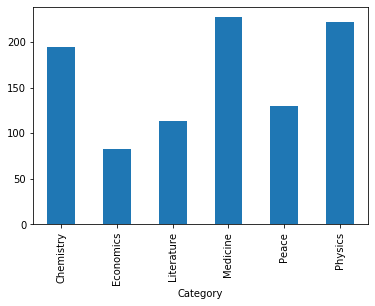

In [15]:
print(cleaned_nps_df.groupby(['Category']).size().sort_values(ascending=False))
cleaned_nps_df.groupby(['Category']).size().plot(kind='bar')
plt.show()

### Question 2: Who are the youngest and the oldest noble prize winners ?
First of all a new column holding the age is added to the data which represents the age of the noble prize winner at the time of winning the prize, it was calculated by subtracting the birth date of the winner from the year of the prize. To get the youngest and the oldest winner the minimum and the maximum values of the age column were obtained

In [16]:
cleaned_nps_df['Birth Date'] = pd.to_datetime(cleaned_nps_df["Birth Date"],errors='coerce')
cleaned_nps_df['Age'] = cleaned_nps_df['Year'] - cleaned_nps_df['Birth Date'].dt.year
Youngest= cleaned_nps_df[cleaned_nps_df['Age'] == min(cleaned_nps_df['Age'])]
Youngest[['Year','Category','Full Name','Age']]

,Year,Category,Full Name,Age
940,2014,Peace,Malala Yousafzai,17.0


In [17]:
oldest = cleaned_nps_df[cleaned_nps_df['Age'] == max(cleaned_nps_df['Age'])]
oldest[['Year','Category','Full Name','Age']]

,Year,Category,Full Name,Age
825,2007,Economics,Leonid Hurwicz,90.0


### Question 3: Who is the first female to win a noble prize ?
In order to identify the first female noble prize winner, we filtered the data according to the column 'Sex' to be female so we can get all the data of the female prize winners, then we chose the first one in the data to get the first ever female winner.


In [18]:
female_noble_winners = cleaned_nps_df[cleaned_nps_df['Sex'] == 'Female']
female_noble_winners.head(1)[['Year','Category','Full Name','Age']]

,Year,Category,Full Name,Age
19,1903,Physics,"Marie Curie, née Sklodowska",36.0


# 